# Plotting with Matplotlib - Wine Quality

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [3]:
wine_df = pd.read_csv("Data/winequality_cleaned.csv")

## Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.

1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [33]:
# get counts for each rating and color
rating_color_counts = wine_df.groupby(["color", "quality"]).count()["pH"]
rating_color_counts

color  quality
Red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
White  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [30]:
# get total counts for each color
total_by_color = wine_df.groupby("color").count()["pH"]
total_by_color

color
Red      1599
White    4898
Name: pH, dtype: int64

In [45]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = rating_color_counts["Red"] / total_by_color["Red"]
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [47]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = rating_color_counts["White"] / total_by_color["White"]
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

## Plot proportions on a bar chart

Set the x coordinate location for each rating group and and width of each bar.

In [54]:
# the x locations for the groups
index = np.arange(len(red_proportions))  

# the width of the bars
width = 0.35       

Now let’s create the plot.

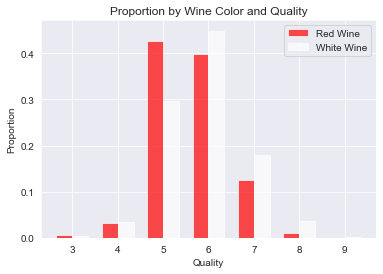

In [55]:
# plot bars
red_bars = plt.bar(index, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(index + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = index + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

Oh, that didn't work because we're missing a red wine value for a the 9 rating. Even though this number is a 0, we need it for our plot. Run the last two cells after running the cell below.

In [50]:
red_proportions["9"] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64